# Series Temporales - 02 - AutoArima

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import pmdarima

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# os.chdir(r"C:\Users\borja\OneDrive\Documents\Formacion_Python\17-Modelos\SeriesTemporales\Teoria")

In [2]:
# Cargamos los datos
datos = pd.read_csv("DatosCreditosPersonales.csv")

In [3]:
del (datos["Unnamed: 0"])

In [4]:
# Pasamos la fecha a formato fecha
datos["Month-Year"] = pd.to_datetime(datos["Month-Year"], format="%b-%y")

In [5]:
# Pasamos la fecha al indice
datos.index = datos["Month-Year"]
del (datos["Month-Year"])

In [8]:
datos["Creditos_Personales"] = datos["Creditos_Personales"].astype(float)

In [9]:
Log_Datos = pd.DataFrame(np.log(datos["Creditos_Personales"]))

In [10]:
# Dividimos en train y test
train = Log_Datos.loc[:"2010-12-01 00:00:00"]
test = Log_Datos["2011-01-01 00:00:00":]

### Pasamos a utilizar el AutoArima  (No lo hace bien)

In [12]:
ArimaModel = pmdarima.auto_arima(train, error_action='ignore', seasonal=True, m=12)

ArimaModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   96
Model:             SARIMAX(2, 0, 0)x(2, 1, 0, 12)   Log Likelihood                 152.990
Date:                            Thu, 05 Dec 2024   AIC                           -293.981
Time:                                    09:36:23   BIC                           -279.396
Sample:                                01-01-2003   HQIC                          -288.118
                                     - 12-01-2010                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0533      0.029      1.860      0.063      -0.003       0.109
ar.L1          0.5582      0.115      4.857      0.000       0.333       0.783
ar.L2          0.2233      0.112      1.998      0.046       0.004       0.442
ar.S.L12      -0.5753      0.132     -4.352      0.000      -0.834      -0.316
ar.S.L24      -0.2480      0.157     -1.582      0.114      -0.555       0.059
sigma2         0.0014      0.000      6.194      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 4.12
Prob(Q):                              0.89   Prob(JB):                         0.13
Heteroskedasticity (H):               0.37   Skew:                             0.11
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
# Sacamos las predicciones del modelo.
test["Predicciones"] = Predicciones = ArimaModel.predict(len(test))

In [20]:
# Estas predicciones son logaritmos por lo que hay que invertir el proceso
test["Creditos_Personales"]  = np.exp(test["Creditos_Personales"])
test["Predicciones"]  = np.exp(test["Predicciones"])

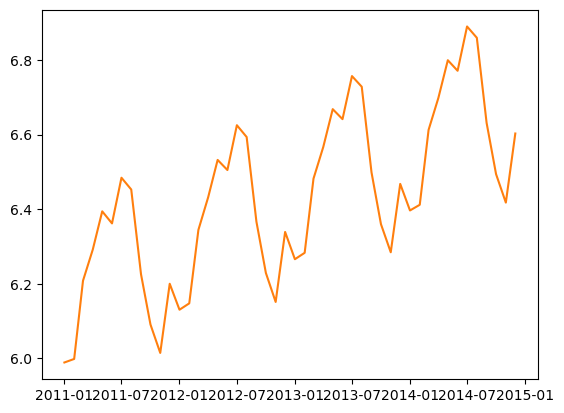

In [22]:
# Graficamos los datos de test.
plt.plot(test)

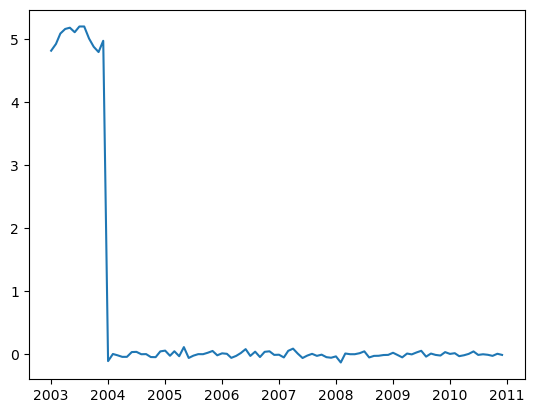

In [24]:
# Analizamos los residuos del modelo.
plt.plot(ArimaModel.resid())

# Comprobamos que los residuos iniciales son altos

In [26]:
# Analizamos el correlograma y el correlograma parcial de los errores
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

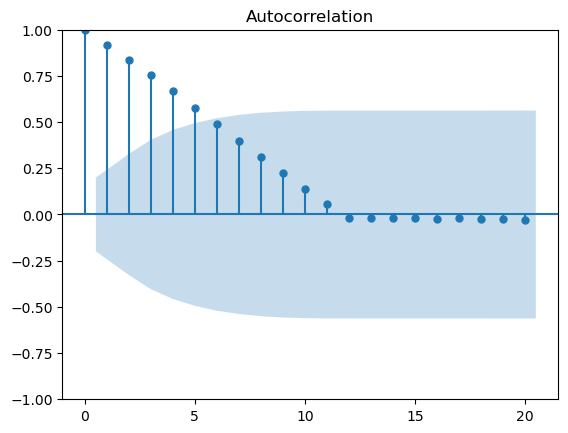

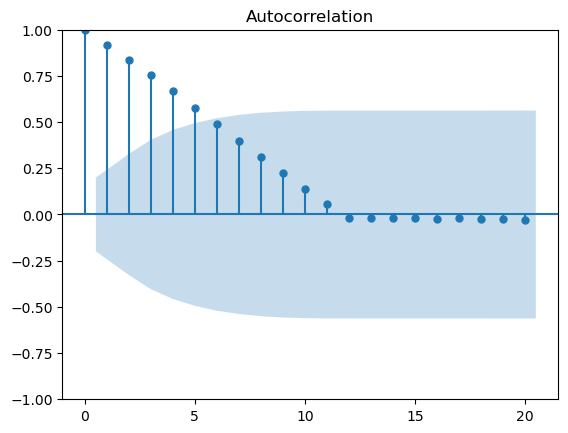

In [27]:
plot_acf(ArimaModel.resid())

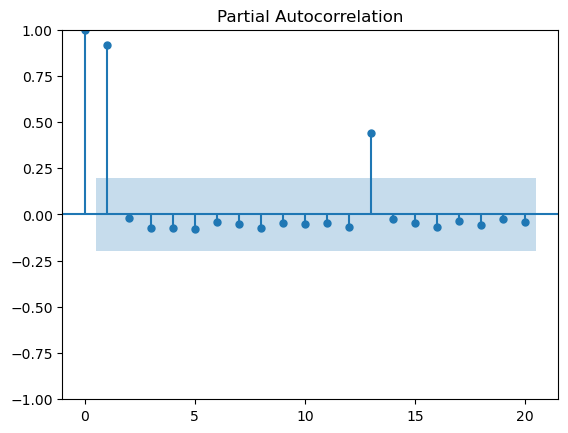

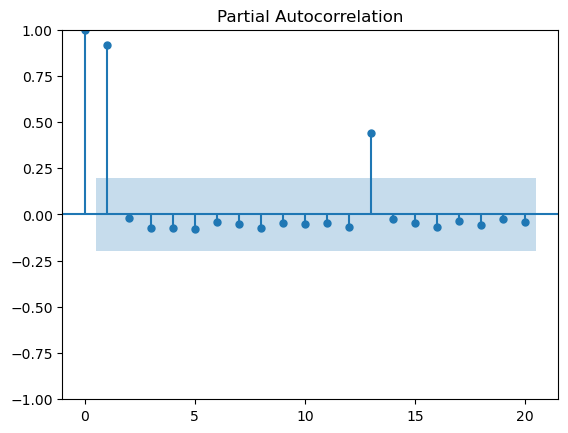

In [28]:
plot_pacf(ArimaModel.resid())

In [ ]:
ECM = (sum((test["Creditos_Personales"] - test["Predicciones"])**2))/len(test)
ECM

inf